### 직접 테스트하고 싶은 거 확인하면서 보기

In [1]:
# Repeat node 예제
import numpy as np

D, N = 8, 7
x = np.random.randn(1, D)
# np.repeat으로 x를 한 줄씩 추가하는 것
y = np.repeat(x, N, axis=0) # row를 기준으로 복제하기
print(f'x size: {x.shape}')
print(f'y size: {y.shape}')

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
x size: (1, 8)
y size: (7, 8)


In [2]:
x

array([[ 1.07840703,  0.56022716,  2.65097516, -0.16894663,  1.04623254,
        -1.45078713,  0.3767504 , -0.05715005]])

In [3]:
# x가 복제되어 같은 값이 계속 들어감
y 

array([[ 1.07840703,  0.56022716,  2.65097516, -0.16894663,  1.04623254,
        -1.45078713,  0.3767504 , -0.05715005],
       [ 1.07840703,  0.56022716,  2.65097516, -0.16894663,  1.04623254,
        -1.45078713,  0.3767504 , -0.05715005],
       [ 1.07840703,  0.56022716,  2.65097516, -0.16894663,  1.04623254,
        -1.45078713,  0.3767504 , -0.05715005],
       [ 1.07840703,  0.56022716,  2.65097516, -0.16894663,  1.04623254,
        -1.45078713,  0.3767504 , -0.05715005],
       [ 1.07840703,  0.56022716,  2.65097516, -0.16894663,  1.04623254,
        -1.45078713,  0.3767504 , -0.05715005],
       [ 1.07840703,  0.56022716,  2.65097516, -0.16894663,  1.04623254,
        -1.45078713,  0.3767504 , -0.05715005],
       [ 1.07840703,  0.56022716,  2.65097516, -0.16894663,  1.04623254,
        -1.45078713,  0.3767504 , -0.05715005]])

In [4]:
dy = np.random.randn(N, D)
# keepdims = True : 차원 수 유지
dx = np.sum(dy, axis=0, keepdims = True) # row를 기준으로 sum하겠다는 것

# sum을 한다는 것은 순전파
# 큰 dimension에서 압축되어 작은 dimension으로 감

# repeat을 한다는 것은 역전파
# 작은 dimension에서 큰 dimension으로 복제해가며 늘리는 작업

In [5]:
# sum 노드 역전파

x = np.random.randn(N, D)
y = np.sum(y, axis=0, keepdims=True)

print(f'x.shape: {x.shape}')
print(f'y.shape: {y.shape}')

x.shape: (7, 8)
y.shape: (1, 8)


### Matmul
행렬의 곱셈 Matrix Multiply의 약자로 `MatMul`을 사용한다. 배치사이즈가 N이라고 할 때 MatMul 노드의 역전파는 다음과 같다.
![matmul](/Users/taghive/Documents/minah/git/ML_study/deep_learning/ch01-Neraul_Network/image/matmul.png)

In [6]:
import numpy as np

# Matmul 클래스 구현
# common/layer.py

class Matmul:
    def __init__(self, W) -> None:
        self.params = [W]
        self.grads = [np.zeros_like(W)]
        self.x = None

    def forward(self, x):
        W, = self.params
        out = np.matmul(x, W)
        self.x = x
        return out
    
    def backward(self, dout):
        W, = self.params
        dx = np.matmul(dout, W.T)
        dW = np.matmul(self.x.T, dout)
        self.grads[0][...] = dW # 깊은 복사
        return dx

- **np.zeros** : 0으로 가득찬 Array를 배출한다. 즉, 여기에는 튜플, int, 혹은 list의 값이 들어와야 한다 그렇게 되면 해당하는 shape으로 형태를 만들어준다음 Array를 return 한다.    
만약 여기에 np.zeros_like 처럼 변수를 넣어주면 오류가 나온다.
- **np.zeros_like** : 어떤 변수만큼의 사이즈인 0 으로 가득 찬 Array를 배출한다. 즉, 여기에는 변수가 들어와야한다.    
여기는 변수 말고도 그냥 [2,3,3] 이렇게 parameter 로 넣어줘도 되는데 이때는 단, 2,3,3 shape을 가진 array가 나오는 것이 아니라 [0, 0, 0] 인 numpy array 가 나온다.

In [7]:
a = np.zeros((4,3))
b = np.array([[1,2,3],[2,3,4],[1,2,2]])
c = np.zeros_like(b) # 어떤 변수가 담긴 array를 넣어도 크기는 유지 되면서 0으로 다 초기화 시켜주는 기능 
print(c)

'''
c는 다음과 같이 나온다.
 [[0,0,0],
  [0,0,0],
  [0,0,0]]
'''

[[0 0 0]
 [0 0 0]
 [0 0 0]]


'\nc는 다음과 같이 나온다.\n [[0,0,0],\n  [0,0,0],\n  [0,0,0]]\n'

In [8]:
# 얕은 복사 깊은 복사 차이
a = np.array([1,2,3])
b = np.array([2,3,4])

a = b

In [9]:
id(a) == id(b)

True

In [10]:
b

array([2, 3, 4])

In [11]:
a = np.array([1,2,3])
b = np.array([2,3,4])

a[...] = b

In [12]:
id(a) == id(b)

False

### Sigmoid

In [13]:
class Sigmoid:
    def __init__(self):
        self.params, self.grads = [], []
        self.out = None

    def forward(self, x):
        out = 1 / (1+np.exp(-x))
        self.out = out
    
    def backward(self, dout):
        dx = dout * (1.0 - self.out) * self.out
        return dx

### Affine 계층
![image](./image/affine.png)

In [14]:
class Affine:
    def __init__(self, W, b):
        self.params = [W, b]
        self.grads = [np.zeros_like(W), np.zeros_like(b)]
        self.x = None

    def forward(self, x):
        W, b = self.params
        out = np.matmul(x, W)  + b
        self.x = x
        return out
    
    def backward(self, dout):
        W, b = self.params
        dx = np.matmul(dout, W.T)
        dW = np.matmul(self.x.T, dout)
        db = np.sum(dout, axis=0)
        
        self.grads[0][...] = dW
        self.grads[1][...] = db
        return dx

### 짚고 넘어가기 softmax함수 구현

In [15]:
a = np.array([1010, 1000, 990])
print(np.exp(a) / np.sum(np.exp(a)))

c = np.max(a)
print(a - c)
print(np.exp(a-c) / np.sum(np.exp(a-c)))

[nan nan nan]
[  0 -10 -20]
[9.99954600e-01 4.53978686e-05 2.06106005e-09]


/var/folders/1p/yzsh1hd153l8nh14x_v7xgd40000gn/T/ipykernel_1341/1345834547.py:2: RuntimeWarning: overflow encountered in exp
  print(np.exp(a) / np.sum(np.exp(a)))
/var/folders/1p/yzsh1hd153l8nh14x_v7xgd40000gn/T/ipykernel_1341/1345834547.py:2: RuntimeWarning: invalid value encountered in divide
  print(np.exp(a) / np.sum(np.exp(a)))


In [2]:
# cross entropy 구현 코드
import numpy as np
def cross_entropy(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
cross_entropy(np.array(y), np.array(t))

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


0.510825457099338

In [17]:
y = [[0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0],
     [0.2, 0.06, 0.0, 0.1, 0.04, 0.2, 0.1, 0.0, 0.1, 0.9]]
np.array(y).argmax(axis=0) 
# argmax를 할 때 axis=0 이면 각 column에서 비교를 해서 row의 요소 수 만큼 출력 값이 나온다.
# axis=1을 하면 각 row 중에서 가장 큰것의 인덱스 값을 출력한다. 즉 위의 경우에는 row가 2개 있으니 2개가 나온다  

array([1, 1, 0, 1, 0, 1, 1, 0, 1, 1])

### Softmax with Loss 계층

In [24]:
import sys
sys.path.append('..') # 부모의 디렉터리 파일을 가져올 수 있도록 설정
import numpy as np
from common.functions import softmax, cross_entropy_error # 그냥 ..common 이렇게 넣으면 모듈을 못불러옴

class SoftmaxWithLoos:
    def __init__(self):
        self.params, self.grads = [], []
        self.y = None # softmax의 출력
        self.t = None # 정답 레이블

    def forward(self, x, t):
        self.t = t
        self.y = softmax(x)

        # 정답 레이블이 원핫 벡터일 경우 정답의 인덱스로 변환
        # cross_entropy_error()에 이미 있어서 굳이 필요 없을 듯
        if self.t.size == self.y.size:
            self.t = self.t.argmax(axis=1)
        
        loss = cross_entropy_error(self.y, self.t)
        return loss
    
    def backward(self, dout=1):
        batch_size = self.t.shape[0] # t의 맨 앞 요소는가 배치 사이즈

        dx = self.y.copy()
        dx[np.arange(batch_size), self.t] -= 1
        dx *= dout
        dx /= batch_size

        return dx

### 가중치 갱신
![SGD](./image/SGD.png)

In [32]:
# 경사하강법 SGD

class SGD:
    '''
    확률적 경사하강법 (SGD, Stochastic Gradient Descent)
        W <- W - lr * (dL/dW)
    '''

    def __init__(self, lr=0.01):
        self.lr = lr

    def update(self, params, grads):
        for i in range(len(params)):
            params[i] -= self.lr * grads[i]
            

In [33]:
# 혼자서 적어보기

class SGD:
    def __init__(self, lr=0.01):
        self.lr = lr
    
    def update(self):
        for i in range(len(self.params)):
            self.params[i] -= self.lr * self.grads[i]

### 실제 신경망 구현해보기

In [34]:
# load dataset
import sys
sys.path.append('..')
import matplotlib.pyplot as plt

from dataset import spiral

x, t = spiral.load_data()
print('x', x.shape)
print('t', t.shape)

x (300, 2)
t (300, 3)


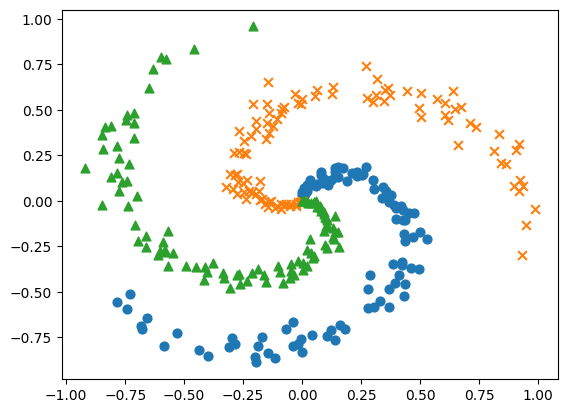

In [35]:
N = 100
CLS_NUM = 3
markers = ['o', 'x', '^']

for i in range(CLS_NUM):
    plt.scatter(x[i*N: (i+1)*N, 0], x[i*N: (i+1)*N, 1], s=40, marker=markers[i])

plt.show()

In [36]:
import sys
sys.path.append('..')
# from common.np import *
from common.layers import Affine, Sigmoid, SoftmaxWithLoos

class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size):
        I, H, O = input_size, hidden_size, output_size
        
        # 가중치 편향 초기화
        W1 = 0.01 * np.random.randn(I, H)
        b1 = np.zeros(H)
        W2 = 0.01 * np.random.randn(H, O)
        b2 = np.zeros(O)

        # 레이어 생성
        self.layers = [
            Affine(W1, b1),
            Sigmoid(),
            Affine(W2, b2)
        ]

        # 모든 가중치를 리스트에 모으기
        self.params = [layer for layer in self.layers]

    def predict(self, x):
        for layer in self.layers:
            x = layer.forward(x)
        return x

### 학습용 코드

In [10]:
import sys
sys.path.append('..')
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from tqdm import tqdm
from common.optimizer import SGD
from dataset import spiral
from two_layer_net import TwoLayersNet

# matplotlib.rc('font', family='Malgun Gothic')
matplotlib.rc('font', family='AppleGothic')

# 1. 하이퍼 파라미터 설정
max_epoch = 300
batch_size = 30
hidden_size = 10
learning_rate = 1.0

# 2. 데이터 읽기, 모델과 옵티마이저 설정
x, t = spiral.load_data()
model = TwoLayersNet(input_size=2,
                     hidden_size=hidden_size,
                     output_size=3)
optimizer = SGD(lr=learning_rate)

# 3. 학습에 사용하는 변수
data_size = len(x)
max_iters = data_size // batch_size
total_loss = 0
loss_count = 0
loss_list = []

for epoch in tqdm(range(max_epoch)):
    # 데이터 셔플링
    idx = np.random.permutation(data_size)
    x = x[idx]
    t = t[idx]

    for iter in range(max_iters):
        batch_x = x[iter*batch_size:(iter+1)*batch_size]
        batch_t = t[iter*batch_size:(iter+1)*batch_size]
    
        # 기울기 구해 매개변수 갱신
        loss = model.forward(batch_x, batch_t)
        model.backward()
        optimizer.update(model.params, model.grads)

        total_loss += loss
        loss_count += 1
        
        # 정기적으로 학습 결과 출력
        if (iter+1) % 10 == 0:
            avg_loss = total_loss / loss_count
            print(f'epoch: {epoch+1} | iter {iter+1}/{max_iters} | loss: {avg_loss:.2f}')
            loss_list.append(avg_loss)
            total_loss, loss_count = 0, 0


100%|██████████| 300/300 [00:00<00:00, 1511.70it/s]

epoch: 1 | iter 10/10 | loss: 1.13
epoch: 2 | iter 10/10 | loss: 1.13
epoch: 3 | iter 10/10 | loss: 1.12
epoch: 4 | iter 10/10 | loss: 1.12
epoch: 5 | iter 10/10 | loss: 1.11
epoch: 6 | iter 10/10 | loss: 1.14
epoch: 7 | iter 10/10 | loss: 1.16
epoch: 8 | iter 10/10 | loss: 1.11
epoch: 9 | iter 10/10 | loss: 1.12
epoch: 10 | iter 10/10 | loss: 1.13
epoch: 11 | iter 10/10 | loss: 1.12
epoch: 12 | iter 10/10 | loss: 1.11
epoch: 13 | iter 10/10 | loss: 1.09
epoch: 14 | iter 10/10 | loss: 1.08
epoch: 15 | iter 10/10 | loss: 1.04
epoch: 16 | iter 10/10 | loss: 1.03
epoch: 17 | iter 10/10 | loss: 0.96
epoch: 18 | iter 10/10 | loss: 0.92
epoch: 19 | iter 10/10 | loss: 0.92
epoch: 20 | iter 10/10 | loss: 0.87
epoch: 21 | iter 10/10 | loss: 0.85
epoch: 22 | iter 10/10 | loss: 0.82
epoch: 23 | iter 10/10 | loss: 0.79
epoch: 24 | iter 10/10 | loss: 0.78
epoch: 25 | iter 10/10 | loss: 0.82
epoch: 26 | iter 10/10 | loss: 0.78
epoch: 27 | iter 10/10 | loss: 0.76
epoch: 28 | iter 10/10 | loss: 0.76
e

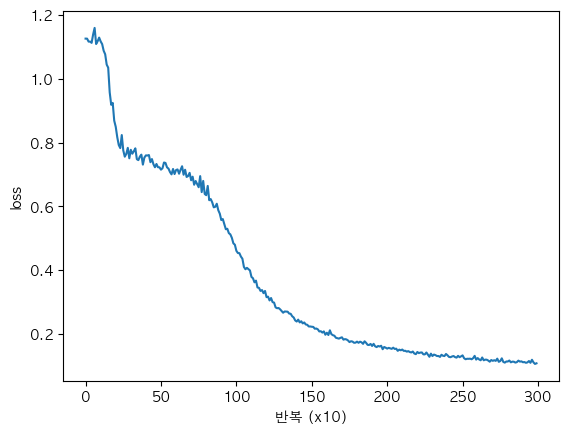

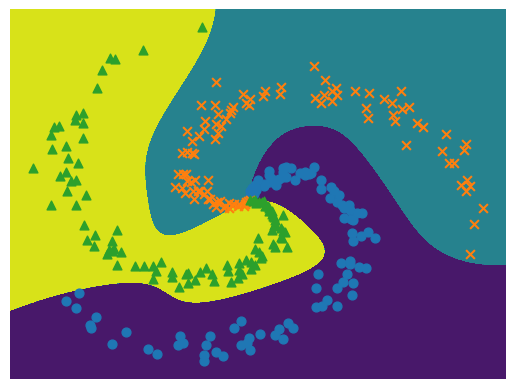

In [12]:
# 학습 결과 플롯
plt.plot(np.arange(len(loss_list)),  loss_list, label='train')
plt.xlabel('반복 (x10)')
plt.ylabel('loss')
plt.show()

# 경계 영역 플롯
h = 0.001
# x[:, 0].min() -> -0.9에 가까운 값, -0.1을 더해줘서 -1.0에 근접한 값으로 바꾸기
x_min, x_max = x[:, 0].min() - .1, x[:, 0].max() + .1
y_min, y_max = x[:, 1].min() - .1, x[:, 1].max() + .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# meshgrid -> 1차원 배열로 주어진 두 개 이상의 배열을 받아서 각 배열의 모든 조합에 대한 2D 그리드를 생성
X = np.c_[xx.ravel(), yy.ravel()] # ravel flatten 해주는 것
score = model.predict(X)
predict_cls = np.argmax(score, axis=1)
Z = predict_cls.reshape(xx.shape)
plt.contourf(xx, yy, Z)
plt.axis('off')

# plt.scatter
x, t = spiral.load_data()
N = 100
CLS_NUM = 3
markers = ['o', 'x', '^']
for i in range(CLS_NUM):
    plt.scatter(x[i*N:(i+1)*N, 0], x[i*N: (i+1)*N, 1], s=40, marker=markers[i])
plt.show()

In [13]:
# 데이터 셔플링
import numpy as np

np.random.permutation(10)

array([3, 5, 0, 9, 7, 6, 1, 2, 4, 8])

In [8]:
import numpy as np
W1 = np.random.randn(2, 3) # 2,3 shape의 평균 0, 표준편차 1의 랜덤한 값으로 채운 np.ndarray 생성
b1 = np.zeros(3)
print(type(W1))
print(W1, b1)
grads = [np.zeros_like(W1), np.zeros_like(b1)]
grads

<class 'numpy.ndarray'>
[[ 0.81428094 -1.03919041 -0.19718926]
 [ 0.0926846   1.31780296  0.11465322]] [0. 0. 0.]


[array([[0., 0., 0.],
        [0., 0., 0.]]),
 array([0., 0., 0.])]